<a href="https://githubtocolab.com/gee-community/geemap/blob/master/docs/notebooks/11_export_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

Uncomment the following line to install [geemap](https://geemap.org) if needed.

In [8]:
# !pip install geemap

In [9]:
import ee
import geemap
import os

In [ ]:
geemap.show_youtube("_6JOA-iiEGU")

In [12]:
ee.Authenticate()
ee.Initialize(project='ee-my-mlc-math-isa-utl') # change project ID

In [13]:
Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

## Download an ee.Image

In [15]:
image = ee.Image("LANDSAT/LE7_TOA_5YEAR/1999_2003")

landsat_vis = {"bands": ["B4", "B3", "B2"], "gamma": 1.4}
Map.addLayer(image, landsat_vis, "LE7_TOA_5YEAR/1999_2003", True, 0.7)

In [16]:
# Draw any shapes on the map using the Drawing tools before executing this code block
feature = Map.draw_last_feature

if feature is None:
    geom = ee.Geometry.Polygon(
        [
            [
                [-115.413031, 35.889467],
                [-115.413031, 36.543157],
                [-114.034328, 36.543157],
                [-114.034328, 35.889467],
                [-115.413031, 35.889467],
            ]
        ]
    )
    feature = ee.Feature(geom, {})

roi = feature.geometry()

### Exporting all bands as one single image

In [23]:
filename = "landsat.tif"
image = image.clip(roi).unmask()
geemap.ee_export_image(
    image, filename=filename, scale=90, region=roi, file_per_band=False
)

Generating URL ...
Please wait ...
Data downloaded to /content/landsat.tif


### Exporting each band as one image

In [25]:
geemap.ee_export_image(
    image, filename=filename, scale=90, region=roi, file_per_band=True
)

Generating URL ...
Please wait ...
Data downloaded to /content


### Export an image to Google Drive

In [26]:
geemap.ee_export_image_to_drive(
    image, description="landsat", folder="export", region=roi, scale=30
)

## Download an ee.ImageCollection

In [28]:
import ee
import geemap
import os

In [97]:
loc = ee.Geometry.Point(-99.2222, 46.7816)
collection = (
    ee.ImageCollection("USDA/NAIP/DOQQ")
    .filterBounds(loc)
    .filterDate("2020-01-01", "2021-01-01")
    .filter(ee.Filter.listContains("system:band_names", "N"))
)

In [98]:
out_dir = '/content'

In [99]:
print(collection.aggregate_array("system:index").getInfo())

['m_4609915_sw_14_060_20200726']


In [100]:
geemap.ee_export_image_collection(collection, out_dir=out_dir, scale=10)

Total number of images: 1

Exporting 1/1: /content/m_4609915_sw_14_060_20200726.tif
Generating URL ...
Please wait ...
Data downloaded to /content/m_4609915_sw_14_060_20200726.tif




In [101]:
geemap.ee_export_image_collection_to_drive(collection, folder="export", scale=10)

Total number of images: 1



## Extract pixels as a Numpy array

In [103]:
import ee
import geemap
import numpy as np
import matplotlib.pyplot as plt

img = ee.Image("NASA/HLS/HLSS30/v002/T12RXT_20240425T174911").select(["B4", "B5", "B6"])

point=ee.Geometry.Point(-109.53, 29.19)
aoi=point.buffer(10000)

rgb_img = geemap.ee_to_numpy(img,region=aoi)
print(rgb_img.shape)

(666, 664, 3)


In [104]:
print(rgb_img.sum(axis=2))

[[0.4054 0.4244 0.4408 ... 0.3446 0.3698 0.361 ]
 [0.3872 0.3983 0.5007 ... 0.2662 0.2719 0.2537]
 [0.3855 0.3748 0.4527 ... 0.2736 0.2729 0.2764]
 ...
 [0.3257 0.3062 0.3153 ... 0.1777 0.4182 0.4669]
 [0.3316 0.3014 0.3005 ... 0.174  0.355  0.4929]
 [0.2962 0.3031 0.3301 ... 0.2184 0.3407 0.521 ]]


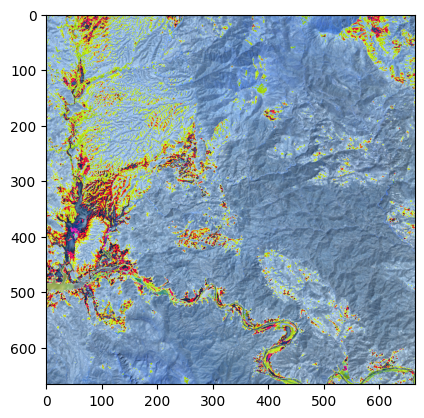

In [105]:
# Scale the data to [0, 255] to show as an RGB image.
rgb_img_test = (255*(rgb_img[:, :, 0:3]-0.01)/0.18).astype("uint8")
plt.imshow(rgb_img_test)
plt.show()